<a href="https://colab.research.google.com/github/mpanuluh/dibimbing-13A/blob/main/Dibimbing_Exploratory_Data_Analysis_I_with_Python_Ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

In this notebook, we will perform Exploratory Data Analysis (EDA) in Python. Steps:
1. Preliminary look at the data
2. Data cleaning
3. Data deep-dive understanding

**Name**: Pararawendy Indarjo
<br>
**Date**: December 2021

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# adjust the path accordingly
data = pd.read_csv('/content/drive/MyDrive/Dibimbing/data/admission_data.csv')

#  Preliminary Look and Data Cleansing

## Sample of data

In [ ]:
# Showing top 5 rows of the data
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


In [ ]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
242,324.0,115.0,3.0,3.5,3.0,8.76,yes,0
21,325.0,114.0,4.0,3.0,2.0,8.40,no,0
340,312.0,107.0,3.0,3.0,3.0,8.46,yes,1
444,324.0,113.0,5.0,4.0,5.0,9.25,yes,1
163,317.0,105.0,3.0,3.5,3.0,8.56,no,0


Observations:
1. All columns, except `research_exp` column, are numeric
2. `research_exp` column seems to contain two distinct values (yes OR no), but will confirm later
3. `admit_status` is apparently also binary (0,1)
4. No obvious defect on the data (column name vs its entries), all looks good

## General Information & Missing Values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


Observation:
1. Data contains 8 columns with 505 rows
2. Most of the columns have missing values (except `research_exp` and `admit_status`), they will be dropped later
3. All dtypes seem OK (appropriate), given the corresponding column name

In [ ]:
# number of missing values per column
data.isna().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_status               0
dtype: int64

In [ ]:
# percentage version
data.isna().sum() * 100 / len(data)

gre_score                  1.782178
toefl_score                1.584158
univ_ranking               1.386139
motiv_letter_strength      0.396040
recommendation_strength    1.188119
gpa                        0.792079
research_exp               0.000000
admit_status               0.000000
dtype: float64

Since number of rows with missing values are small in proportion (< 5%), we can simply drop them.

In [ ]:
# if they are significant in number we can impute them
# Rule of thumb (not always correct, tho)
# Numeric col --> data['column_name'].fillna(data['column_name'].median)
# Categorical col --> data['column_name'].fillna(data['column_name'].mode)

In [ ]:
# sample
data['gre_score'].fillna(data['gre_score'].median)

0      337.0
1      324.0
2      316.0
3      322.0
4      314.0
       ...  
500    313.0
501    328.0
502    321.0
503    325.0
504    314.0
Name: gre_score, Length: 469, dtype: float64

In [ ]:
# sample 
data['research_exp'].fillna(data['research_exp'].mode)

0      yes
1      yes
2      yes
3      yes
4       no
      ... 
500    yes
501    yes
502    yes
503    yes
504     no
Name: research_exp, Length: 469, dtype: object

### Drop missing values

In [ ]:
# drop na values
data = data.dropna()

In [ ]:
# sanity check
data.isna().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
dtype: int64

Success removing NULL values! :)

## Duplicated data check

In [ ]:
# number of duplicated data
data.duplicated().sum()

5

There are 13 duplicated rows; will be dropped later.

In [ ]:
# sample duplicated rows
data[data.duplicated(keep=False)].sort_values('gre_score').head(6)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
364,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
74,314.0,106.0,3.0,3.0,5.0,8.90,no,1
504,314.0,106.0,3.0,3.0,5.0,8.90,no,1
111,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0


### Drop duplicated rows

In [ ]:
# drop duplicated rows
data = data.drop_duplicates()

In [ ]:
# sanity check
data.duplicated().sum()

0

Good good! Duplicated rows have gone :)

# Data understanding

## Statistical summary

In [ ]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['research_exp']

numericals = ['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength','recommendation_strength','gpa','admit_status']

In [ ]:
# numerical statistical sumary
data[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_status
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,316.327586,107.090517,3.118534,3.366379,3.476293,8.567241,0.571121
std,11.242104,5.934888,1.119704,0.968974,0.919244,0.598476,0.495450
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000
50%,316.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000
75%,324.000000,111.250000,4.000000,4.000000,4.000000,9.025000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


Observation:
* `univ_ranking` column is actually a categorial data, with the value from 1 to 5 (integer)
* `motiv_leter_strength` column is actually a categorial data, with the value from 1 to 5 (increment in 0,5)
* `admit_status` column is boolean/binary column since the value is 0 or 1
* Overall, the minimum and maximum values make sense for each column
* Mean ~ 50% (Median) in `gre_score`, `toefl_score`, `recomendation_strength`, and `gpa` ccolumn, indicating somewhat a symmetrical distribution
* Mean > 50% (Median) in `univ_ranking` column, indicating both are positively skewed distribution
* Mean < 50% (Median) in `motiv_letter_strength` column, indicating both are negatively skewed distribution

In [ ]:
# describe method on categorical data
data[categoricals].describe()

,research_exp
count,464
unique,2
top,yes
freq,252


Observations:
* `research_exp` have 2 unique value, 'yes', and 'no'
* student most have research_exp (276 rows), and the rest have no research experience.

In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of research_exp column
yes    252
no     212
Name: research_exp, dtype: int64 



# Univariate Analysis

## Boxplot to detect outliers

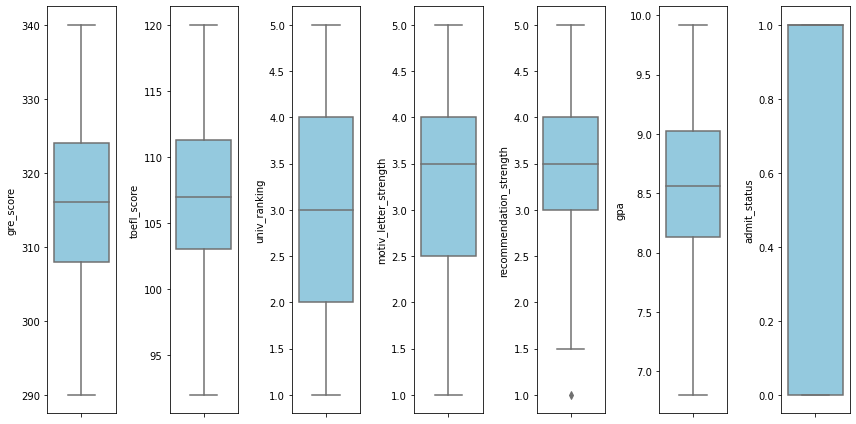

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='skyblue')
    plt.tight_layout()

Obervation:
1. There is one outlier in the `recommendation_strength` column (value 1)

## KDE plot for knowing the distribution form

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

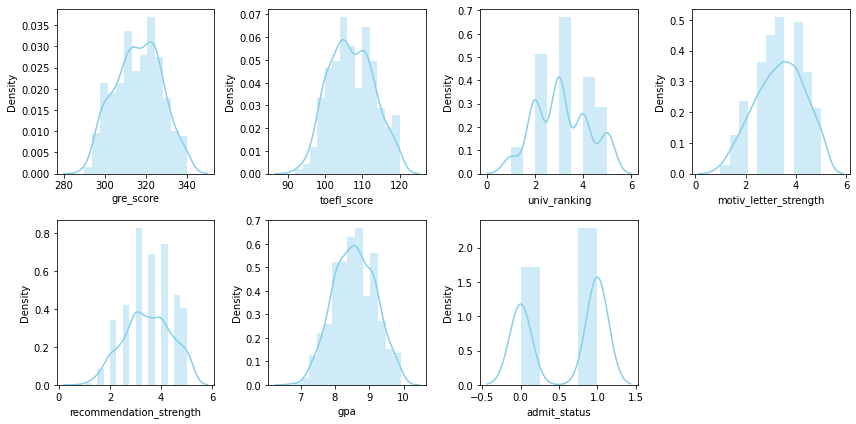

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. `motiv_letter_strength` has the most symmetric distribution
2. Many columns are slightly skewed but still somewhat symmetric: `gre_score`, `toefl_score`, `univ_ranking`, `recommendation_strength`, and `gpa`.
3. admit_status has boolean value, 0 and 1.

# Bivariate Analysis

In [ ]:
# remember the dataset
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


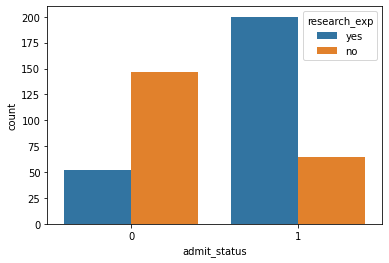

In [ ]:
# research_exp affect admit_status?
sns.countplot(data=data,
            x='admit_status',
            hue='research_exp')

1. Let's say admit_status = 1, means admitted, and admit_status = 0, means otherwise
2. We can say that, applicants with research experience is more likely to be admitted.

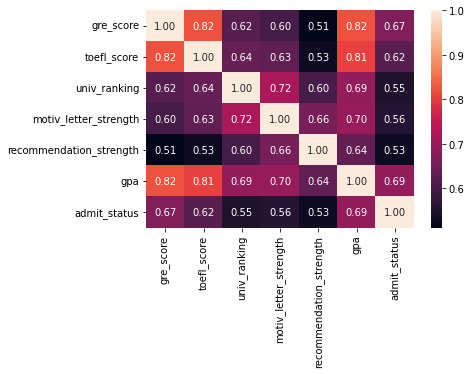

In [ ]:
# correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

1. `toefl_score`, `gre_score`, and `gpa` are highly correlated each other
2. choose either of them for modelling because they are redundant (will be discussed in Linear Regression class :) 

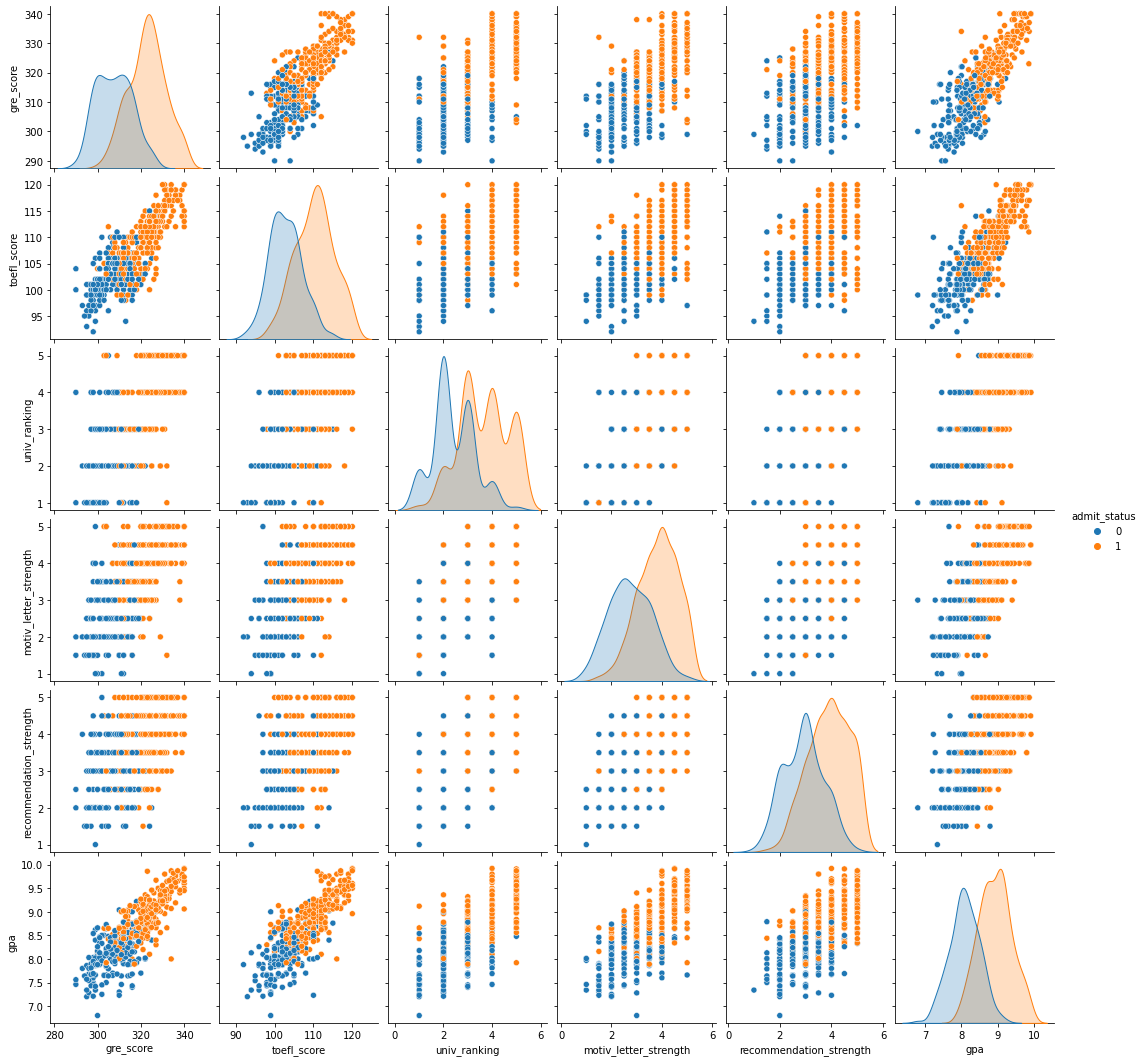

In [ ]:
# pairplot of the data
sns.pairplot(data, hue='admit_status')

Observation
1. Left as exercise!

# EDA Conclusion
1. The data does not contain major issues. There are only some NULL values and duplicated rows. We've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with numerical values are somewhat symmetric.
4. From the barplot we can see outlier in `recommendation_strength` column. But it makes sense, because the min and max value are 1 and 5, the outlier is at "1", and it's possible.
5. From barcharts of `admit_status` and `research_exp` column,  We can say that, applicants with research experience is more likely to be admitted.
6. From correlation heatmap: We can see that `gre_score` is correlated with `gpa` and `toefl_score`. We can choose either of them for modelling.